# 데이터 분포의 시각화 - 히스토그램, 밀도 그래프

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [3]:
titanic = pd.read_csv('./data/titanic.csv')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Histogram

히스토그램을 그릴 때 항상 구간의 폭을 여러가지로 바꿔 가면서 시험해 보자.

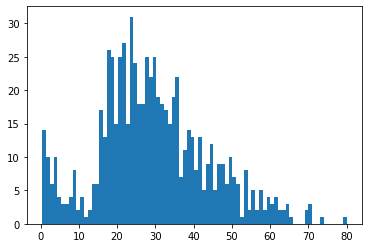

In [5]:
plt.hist(titanic.Age, bins = 80)
plt.show()

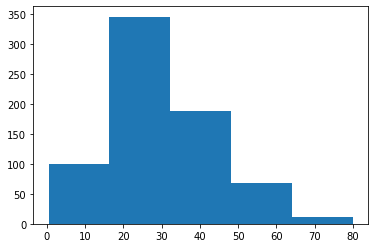

In [6]:
plt.hist(titanic.Age, bins = 5)
plt.show()

### Histogram - Density plot

**density** : True 로 설정하면 확률 밀도(probability density)를 그려서 표시한다. 


각 bin은 다음 공식을 사용하여 정규화된다. bin width를 이용하여 정규화 된다. 

`density = counts / (sum(counts) * np.diff(bins))`  


따라서 해당 히스토그램의 하부 면적의 합은 1로 정규화된다.

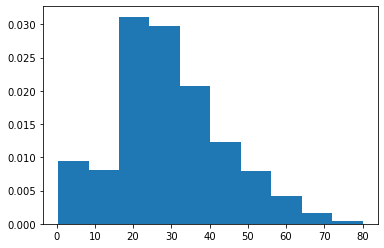

In [7]:
x = plt.hist(titanic.Age, density=True)

### seaborn 히스토그램 & 밀도그래프

참고) https://seaborn.pydata.org/generated/seaborn.histplot.html

<AxesSubplot:xlabel='Age', ylabel='Count'>

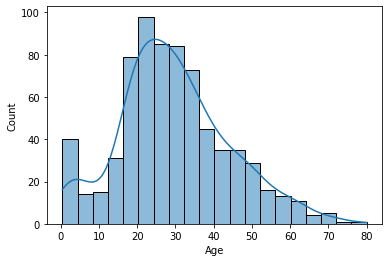

In [7]:
sns.histplot(titanic.Age, kde=True)

### KDE 밀도 추정

커널 밀도 추정이란 데이터 포인트 지점마다 폭이 좁은(‘대역폭(bandwidth)’이라고 부르는 매개변수를 사용하여 통제) 연속 곡선(커널)을 그린 다음 이 곡선들을 전부 더해서 최종 밀도 추정 값을 구하는 작업이다. bandwidth를 크게 하면 밀도 추정 함수가 밋밋해지고 bandwidth를 작게 하면 밀두 추정 함수가 울퉁불퉁해진다. 이때 커널 함수로는 가우시안 커널(Gaussian kernel) 보편적으로 사용한다. 

커널 밀도 추정에서 일부 영역 특히 꼬리 부분의 데이터 값을 주의해야 한다. 예를 들어 음수의 나이가 포함된 연령 분포가 나올 수 있다. 

#### sns.kdeplot

* bw_adjust: 값을 증가하면 곡선이 더 부드러워진다. (평활화)
* cut : 0으로 설정하면 데이터 한계에서 곡선을 자른다.

<AxesSubplot:xlabel='Age', ylabel='Density'>

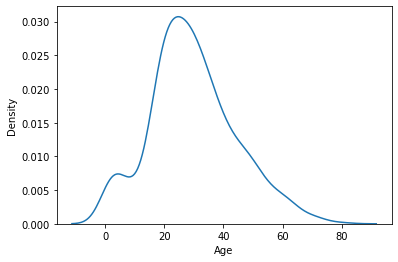

In [8]:
sns.kdeplot(titanic.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

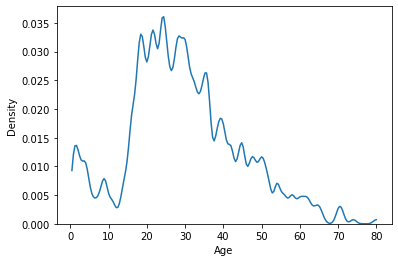

In [9]:
sns.kdeplot(titanic.Age, bw_adjust=0.2, cut=0)

### 중첩 밀도 그래프

둘 이상의 변수에 따른 데이터의 분포 상태를 하나의 도표로 나타내야 하는 경우가 있다. 성별에 따른 타이타닉호 연령대 분포의 차이를 예로 들어 보자. 이를 시각화하기 위해서 누적 히스토그램(stacked histogram)을 사용할 수 있다. 그러나 이런 방법은 막대의 높이(도수)를 바로 비교하기 힘들다. 

이런 경우에는 중첩 밀도 그래프를 쓰면 중첩 히스토그램 같은 문제를 일으키지 않는다. 

**타이타닉 승객의 성별에 따른 밀도 추정(중첩 밀도 그래프)**  
데이터셋의 특징에서 어린 나이의 남성, 여성의 분포가 거의 같지만 20 ~ 50대에서 여성의 비율이 매우 낮다.

<AxesSubplot:xlabel='Age', ylabel='Count'>

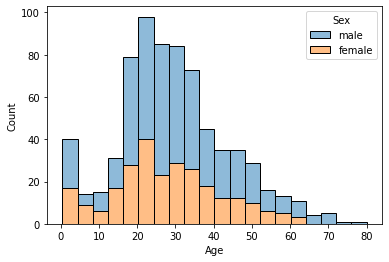

In [10]:
sns.histplot(data=titanic, x="Age", hue="Sex", multiple="stack", alpha=.5)

<AxesSubplot:xlabel='Age', ylabel='Density'>

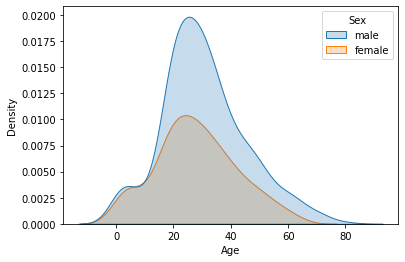

In [11]:
sns.kdeplot(data=titanic, x = "Age", hue="Sex", fill=True)

## 이변량 데이터의 분포 시각화

* 이변량이란? - 이변량 자료란 한 관측대상에 대하여 두 가지의 수치로 나타나는 자료를 말한다. 학생 각각 키와 몸무게는 두 가지의 수치로 된 자료이므로 이변량 자료이다. 즉 변수가 2개라는 의미이다.


In [20]:
import seaborn as sns
import pandas as pd

In [22]:
geyser = pd.read_csv('./data/geyser.csv')

<AxesSubplot:xlabel='waiting', ylabel='duration'>

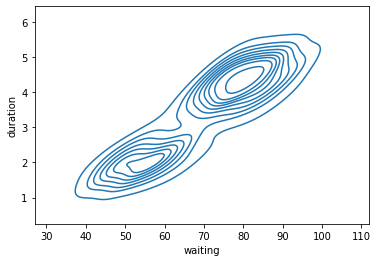

In [23]:
sns.kdeplot(data=geyser, x="waiting", y="duration")

<AxesSubplot:xlabel='waiting', ylabel='duration'>

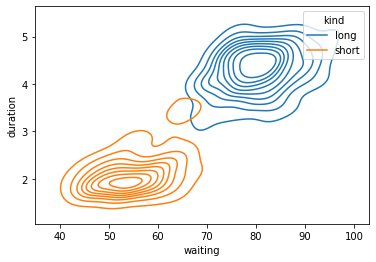

In [3]:
sns.kdeplot(data=geyser, x="waiting", y="duration", hue="kind")

<AxesSubplot:xlabel='waiting', ylabel='duration'>

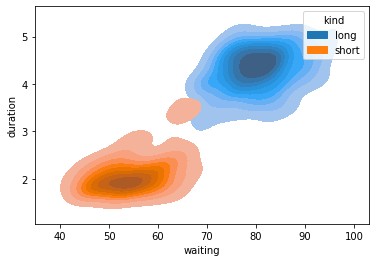

In [4]:
sns.kdeplot(data=geyser, x="waiting", y="duration", hue="kind", fill=True)

### matplotlib - hist2d


In [6]:
import matplotlib.pyplot as plt

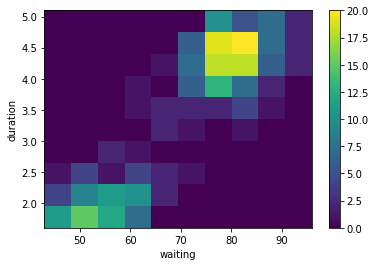

In [14]:
plt.hist2d(geyser.waiting, geyser.duration)
plt.xlabel('waiting')
plt.ylabel('duration')
plt.colorbar()
plt.show()

# 히스토그램 밀도그래프 실습

1. 타이타닉 데이터 셋을 읽어 들인다.
```
iris = pd.read_csv('./data/iris.csv')
iris.info()
```
2. "petal_length"의 분포를 히스토그램으로 나타내시오.
3. "species"별로 "petal_length"의 분포를 히스토그램으로 나타내시오.
4. 'petal_length'와 'sepal_length'의 분포를 kde plot으로 시각화 하시오.
5. 'petal_length'와 'sepal_length'의 kde plot을 종(species)별로 비교하여 시각화 하시오.